## Step Function

In [43]:
def step_function(x):
    """If the input is greater than 0, output will be a 1, otherwise output is 0"""
    if x > 0:
        return 1
    else:
        return 0

Testing the step function

In [6]:
print(step_function(2000))
print(step_function(-8))

1
0


In [7]:
inputs = [1, 200, -2, 0, 500]

for input in inputs:
    print(f'Input: {input} --> Output: {step_function(input)}')

Input: 1 --> Output: 1
Input: 200 --> Output: 1
Input: -2 --> Output: 0
Input: 0 --> Output: 0
Input: 500 --> Output: 1


Let's practice numpy before we implement a new step_function

In [8]:
import numpy as np

In [9]:
x = np.array([1, 200, -2, 0, 500])
x > 0

array([ True,  True, False, False,  True])

In [10]:
(x > 0).astype(int)

array([1, 1, 0, 0, 1])

Now lets redo step_function using numpy

In [11]:
def step_function(x):
    """This implementation of the step_function can handle a numpy array as an input"""
    return (x > 0).astype(int)

In [12]:
step_function(x)

array([1, 1, 0, 0, 1])

Lets plot step_function

In [13]:
import matplotlib.pyplot as plt

In [14]:
x = np.arange(-10.0, 10.0, 0.1)
y = step_function(x)

Text(0.5, 1.0, 'Step Function')

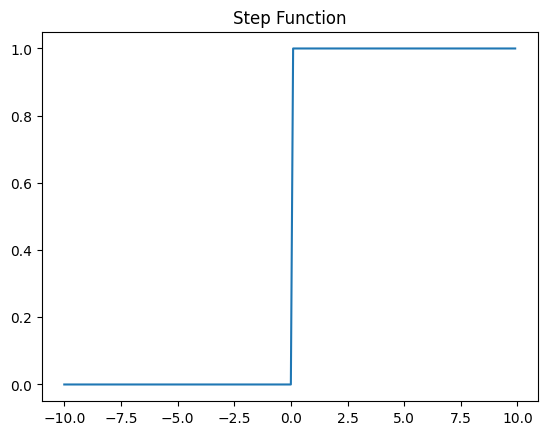

In [15]:
plt.plot(x, y)
plt.title('Step Function')

## Sigmoid Function

In [16]:
def sigmoid(x):
    """Can take a numpy array as an input, and will return numpy array as well"""
    return 1/(1 + np.exp(-x))

Lets plot sigmoid

In [17]:
y = sigmoid(x)

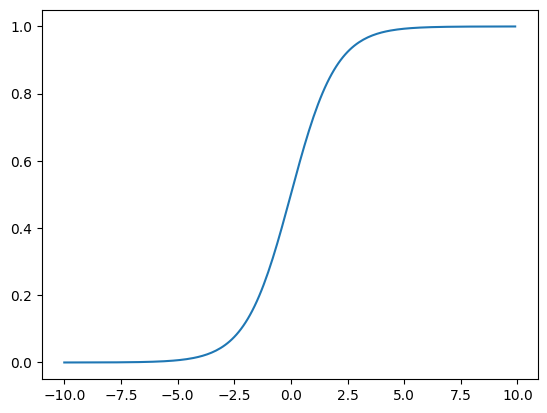

In [18]:
plt.plot(x, y)

## Multi-dimensional Array

In [19]:
w = np.array([[1, 3, 5], [2, 4, 6]])
print(w)

[[1 3 5]
 [2 4 6]]


In [20]:
x = np.array([10, 20])
print(x)

[10 20]


In [21]:
y = np.dot(x, w)
print(y)

[ 50 110 170]


## Multi-layer Perceptron (MLP)

Layer 1

In [22]:
x = np.array([7.0, 2.0])

In [23]:
w1 = np.array([[0.7, 0.9, 0.3], [0.5, 0.4, 0.1]])

In [24]:
b1 = np.array([1, 1, 1])

In [25]:
a1 = np.dot(x, w1) + b1

In [26]:
# The outputs from z1 will be the inputs to the next layer

z1 = sigmoid(a1)
print(z1)

[0.99899323 0.99969655 0.96442881]


Layer 2

In [27]:
w2 = np.array([[0.2, 0.3], [0.4, 0.5], [0.22, 0.1234]])

In [28]:
b2 = np.array([0.5, 0.5])

In [29]:
a2 = np.dot(z1, w2) + b2

In [30]:
z2 = sigmoid(a2)
print(z2)

[0.78782283 0.80511206]


Layer 3

In [31]:
def identity(x):
    """Returns the input"""
    return x

In [32]:
w3 = np.array([[0.7, 0.1], [0.123, 0.314]])

In [33]:
b3 = np.array([0.1, 0.2])

In [34]:
a3 = np.dot(z2, w3) + b3

In [35]:
# In this case, z3 will give us the final output which is [0.75050477 0.53158747]

z3 = identity(a3)
print(z3)

[0.75050477 0.53158747]


## Creating functions to help with MLP

In [36]:
def init_network():
    """Sets up the weights and biases for each layer of the perceptron and returns the net"""
    net = {}
    # Layer 1
    net['w1'] = np.array([[0.7, 0.9, 0.3], [0.5, 0.4, 0.1]])
    net['b1'] = np.array([1, 1, 1])
    #Layer 2
    net['w2'] = np.array([[0.2, 0.3], [0.4, 0.5], [0.22, 0.1234]])
    net['b2'] = np.array([0.5, 0.5])
    #Layer 3 <-- Output
    net['w3'] = np.array([[0.7, 0.1], [0.123, 0.314]])
    net['b3'] = np.array([0.1, 0.2])

    return net

def forward(net, x):
    """Takes in the input to the perceptron as a numpy array, and returns the final output after all computations are finished"""
    w1, w2, w3 = net['w1'], net['w2'], net['w3']
    b1, b2, b3 = net['b1'], net['b2'], net['b3']

    a1 = np.dot(x, w1) + b1
    z1 = sigmoid(a1)

    a2 = np.dot(z1, w2) + b2
    z2 = sigmoid(a2)

    a3 = np.dot(z2, w3) + b3
    y = identity(a3)

    return y


In [37]:
net = init_network()
forward(net, np.array([7.0, 2.0]))

array([0.75050477, 0.53158747])

## MultiLayerPerceptron Class

In [38]:
class MultiLayerPerceptron:
    def __init__(self):
        self.net = {}
        pass

    def init_network(self):
        net = {}
        # Layer 1
        net['w1'] = np.array([[0.7, 0.9, 0.3], [0.5, 0.4, 0.1]])
        net['b1'] = np.array([1, 1, 1])
        #Layer 2
        net['w2'] = np.array([[0.2, 0.3], [0.4, 0.5], [0.22, 0.1234]])
        net['b2'] = np.array([0.5, 0.5])
        #Layer 3 <-- Output
        net['w3'] = np.array([[0.7, 0.1], [0.123, 0.314]])
        net['b3'] = np.array([0.1, 0.2])

        self.net = net
    
    def forward(self, x):
        w1, w2, w3 = self.net['w1'], self.net['w2'], self.net['w3']
        b1, b2, b3 = self.net['b1'], self.net['b2'], self.net['b3']

        a1 = np.dot(x, w1) + b1
        z1 = self.sigmoid(a1)

        a2 = np.dot(z1, w2) + b2
        z2 = self.sigmoid(a2)

        a3 = np.dot(z2, w3) + b3
        y = self.identity(a3)

        return y
    
    def identity(self, x):
        return x
    
    def sigmoid(self, x):
        return 1/(1 + np.exp(-x))

Let's use this class

In [39]:
mlp = MultiLayerPerceptron()
mlp.init_network()
y = mlp.forward(np.array([7.0, 2.0]))

In [40]:
print(y)

[0.75050477 0.53158747]
